In [4]:
import struct
import numpy as np
from typing import NamedTuple
import datetime
import matplotlib.pyplot as plt
from glob import glob
import cwb_qpesums as cwb

import cwb_qpesums_3D as cwb_3D


# 3D example by Isaac

In [27]:
fname_dbz = "3D_data_test/MREF3D21L.20120101.0000"

hdr_dbz, image_dbz = cwb_3D.import_qpesums_bin(fname_dbz)
nx_dbz = hdr_dbz.dims[0]
ny_dbz = hdr_dbz.dims[1]
nz_dbz = hdr_dbz.dims[2]

image_dbz = image_dbz.reshape(nz_dbz, ny_dbz, nx_dbz)

image_dbz[image_dbz == hdr_dbz.no_data_value] = np.nan

print(image_dbz.shape)

print(f'nCols = {ncols_dbz}, nRows = {nrows_dbz}')
print(f'xll = {hdr_dbz.xy_ll[0]}, yll = {hdr_dbz.xy_ll[1]}')
print(f'dx = {hdr_dbz.ds[0]}, dy = {hdr_dbz.ds[1]}')

#1. yyyy: 2012, mm: 1, dd: 1, hh: 0, mn: 0, ss: 0, nx:441, ny:561, nz:21
#2. proj: b'LL  '
#3. map_scale: 1000, projlat1: 30000, projlat2: 60000, projlon: -98000
#3. x_tl: 118000, y_tl: 27000, xy_scale: 1000, dx: 1250, dy: 1250, dxy_scale: 100000
#4. (1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 1, 1, 17000, 17000, 17000, 17000, 17000, 17000, 17000, 17000, 17000)
#5. varname: b'mosaicked refl\x00\x00\x00\x00\x00\x00', varunit: b'dbz   '
#5. nradars: 4, no_data_value: -999, varscale: 10, radars: (b'RCKT', b'RCWF', b'RCCG', b'RCHL')
### hdr: qpesums_header(dt=datetime.datetime(2012, 1, 1, 0, 0), dims=(441, 561, 21), xy_ll=(118.0, 20.0), ds=(0.0125, 0.0125), proj=b'LL  ', varname=b'mosaicked refl\x00\x00\x00\x00\x00\x00', varunit=b'dbz   ', varscale=10, no_data_value=-999, radars=(b'RCKT', b'RCWF', b'RCCG', b'RCHL'))
(21, 561, 441)
nCols = 441, nRows = 561
xll = 118.0, yll = 20.0
dx = 0.0125, dy = 0.0

In [28]:
lons_rr, lats_rr = cwb.get_qpesums_xy(hdr_dbz)

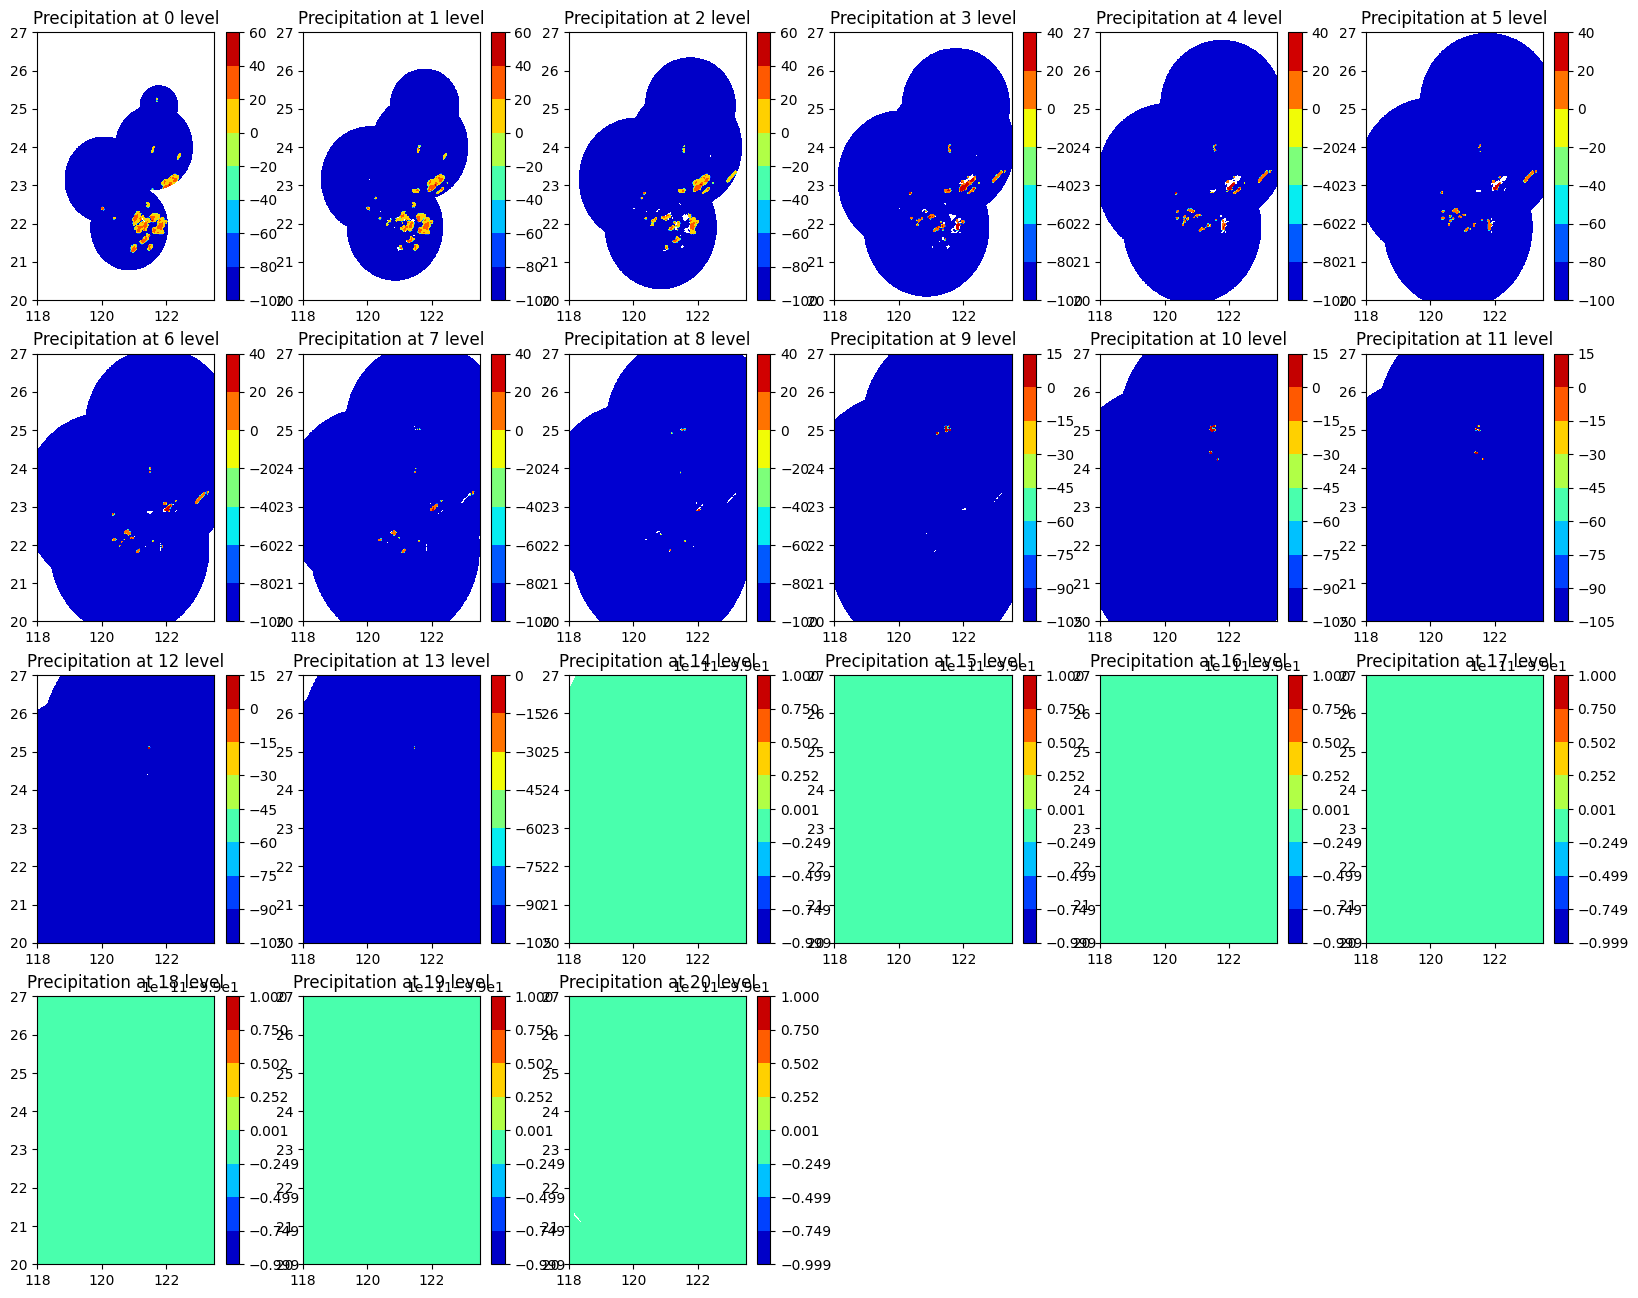

In [30]:
plt.rcParams["figure.figsize"] = (20,16)

fig = plt.figure()
for i in range(hdr_dbz.dims[2]):
    plt.subplot(4, 6, i+1)
    
    plt_ctrl = plt.contourf(lons_rr,lats_rr,image_dbz[i, ...])
    plt.colorbar(plt_ctrl,orientation='vertical')
    plt.title(f'Precipitation at {i} level')
    plt.set_cmap(cmap=plt.get_cmap('jet'))

    
    # plt.imshow(image_dbz[i, ...])
    # plt.colorbar(orientation='vertical')
    # plt.title(f'Precipitation at {i} level')
    # plt.set_cmap(cmap = plt.get_cmap('jet'))
# plt.imshow(image_dbz[..., 5])

# Use contourf to plot rain_map
# plt_ctrl=plt.contourf(lons_rr,lats_rr,image_dbz[..., 5])
# plt.colorbar(plt_ctrl,orientation='vertical')
# plt.title('Precipitation')
# plt.set_cmap(cmap=plt.get_cmap('jet'))

# 2D example by LP

In [5]:
fname_dbz = 'fn_compref_mosaic/COMPREF.20210110.1810'

hdr_dbz, image_dbz = cwb.import_qpesums_bin(fname_dbz)
ncols_dbz = hdr_dbz.dims[0]
nrows_dbz = hdr_dbz.dims[1]
image_dbz = image_dbz.reshape(nrows_dbz, ncols_dbz)

image_dbz[image_dbz == hdr_dbz.no_data_value] = np.nan

print(f'nCols = {ncols_dbz}, nRows = {nrows_dbz}')
print(f'xll = {hdr_dbz.xy_ll[0]}, yll = {hdr_dbz.xy_ll[1]}')
print(f'dx = {hdr_dbz.ds[0]}, dy = {hdr_dbz.ds[1]}')

nCols = 921, nRows = 881
xll = 115.0, yll = 18.0
dx = 0.0125, dy = 0.0125


In [6]:
image_dbz

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [7]:
fname_rr = 'fn_compref_mosaic/CB_GC_PCP_1H_RAD.20210110.1810'
hdr_rr, image_rr = cwb.import_qpesums_bin(fname_rr)
ncols_rr = hdr_rr.dims[0]
nrows_rr = hdr_rr.dims[1]
image_rr = image_rr.reshape(nrows_rr, ncols_rr)

image_rr[image_rr == hdr_rr.no_data_value] = np.nan

print(f'nCols = {ncols_rr}, nRows = {nrows_rr}')
print(f'xll = {hdr_rr.xy_ll[0]}, yll = {hdr_rr.xy_ll[1]}')
print(f'dx = {hdr_rr.ds[0]}, dy = {hdr_rr.ds[1]}')

nCols = 441, nRows = 561
xll = 118.0, yll = 20.0
dx = 0.0125, dy = 0.0125


In [8]:
idx_i_s = int((hdr_rr.xy_ll[0]-hdr_dbz.xy_ll[0])//hdr_dbz.ds[0])
idx_i_e = idx_i_s + ncols_rr
idx_j_s = int((hdr_rr.xy_ll[1]-hdr_dbz.xy_ll[1])//hdr_dbz.ds[1])
idx_j_e = idx_j_s + nrows_rr

idx_j_s, idx_j_e

(159, 720)

In [9]:
image_dbz_rr = image_dbz[idx_j_s:idx_j_e,idx_i_s:idx_i_e]
#image = 10**((image_dbz_rr/10 - np.log10(200))/1.6)
image = np.power(10.,(image_dbz_rr/10 - np.log10(300))/3.5)
image

array([[0.00029086, 0.00029086, 0.00029086, ..., 0.00029086, 0.00029086,
        0.00029086],
       [0.00029086, 0.00029086, 0.00029086, ..., 0.00029086, 0.00029086,
        0.00029086],
       [0.00029086, 0.00029086, 0.00029086, ..., 0.00029086, 0.00029086,
        0.00029086],
       ...,
       [0.00029086, 0.00029086, 0.00029086, ..., 0.00029086, 0.00029086,
        0.00029086],
       [0.00029086, 0.00029086, 0.00029086, ..., 0.00029086, 0.00029086,
        0.00029086],
       [0.00029086, 0.00029086, 0.00029086, ..., 0.00029086, 0.00029086,
        0.00029086]], dtype=float32)

In [10]:
lons_rr, lats_rr = cwb.get_qpesums_xy(hdr_rr)

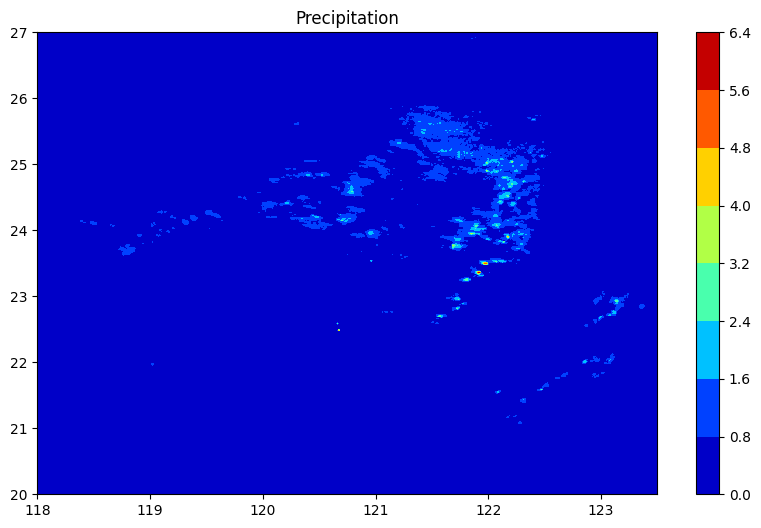

In [11]:
plt.rcParams["figure.figsize"] = (10,6)

# Use contourf to plot rain_map
plt_ctrl=plt.contourf(lons_rr,lats_rr,image)
plt.colorbar(plt_ctrl,orientation='vertical')
plt.title('Precipitation')
plt.set_cmap(cmap=plt.get_cmap('jet'))

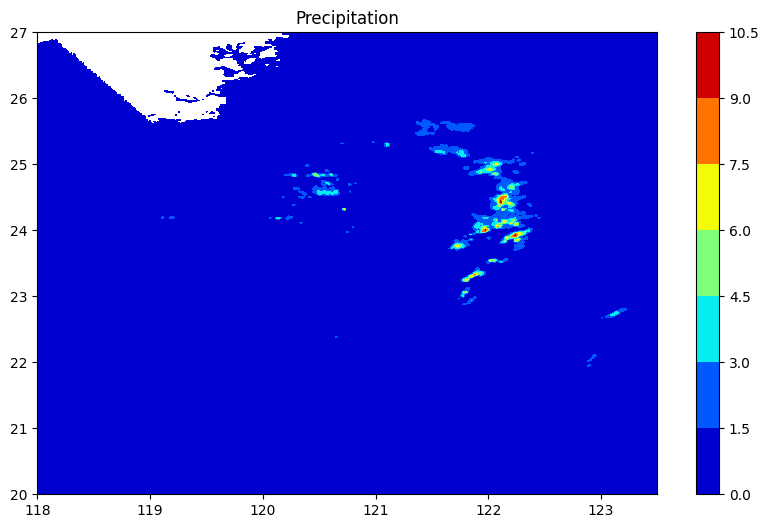

In [12]:
plt.rcParams["figure.figsize"] = (10,6)

# Use contourf to plot rain_map
plt_ctrl = plt.contourf(lons_rr,lats_rr,image_rr)

plt.colorbar(plt_ctrl,orientation='vertical')
plt.title('Precipitation')
plt.set_cmap(cmap=plt.get_cmap('jet'))